In [1]:
import os 
import csv
import pandas as pd
import numpy as np

The goal of this notebook is to explore the content of the listed below files, **identifying in which input fields the useful information lies, pinpointing the connections btw the files, and to merge all the data into a structure** which is ready to be fed into the graph.

In [2]:
#Available data - files
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files: print(f)

.gitignore
D-ARCH.xlsx
Data exploration.ipynb
Data import.ipynb
Data Overview.docx
ETH Professor list.xlsx
Maurer_Hansruedi_2020-10-08_16_28_49.doc
README.md
ResearchCollection.xlsx
ResearchCollectionPublications2008_2018.tsv


# ResearchCollectionPublications2008_2018.tsv

In [3]:
rcp = pd.read_csv("ResearchCollectionPublications2008_2018.tsv", sep="\t", header=0, encoding="latin-1") #utf8 not working...

C:\Users\danie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20,37,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rcp.head(10)

,RC_ID,COLLECTION,DC_CONTRIBUTOR_AUTHOR,DC_CONTRIBUTOR_EDITOR,DC_DATE_ISSUED,DC_DATE_PUBLISHED,DC_IDENTIFIER_DOI,DC_IDENTIFIER_ISBN,DC_IDENTIFIER_ISSN,DC_IDENTIFIER_OTHER,...,ETHZ_GRANT,ETHZ_GRANT_FUNDERDOI,ETHZ_GRANT_FUNDERNAME,ETHZ_GRANT_PROGRAM,ETHZ_IDENTIFIER_DISS,ETHZ_IDENTIFIER_PUBMED,DC_IDENTIFIER_WOS,ETHZ_IDENTIFIER_ORCIDWORKCODE,DC_CONTRIBUTOR_OTHER,ETHZ_IDENTIFIER_ARXIV
0,241217,NaN,"Renner, Renato","Kao, Ming-Yang",2008,NaN,NaN,978-0-387-30770-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11574,NaN,"Diekmann, Andreas||Jann, Ben","Farzin, Sina||Jordan, Stefan",2008,NaN,NaN,978-3-15-010661-7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202843,20.500.11850/13,NaN,"Glaser, Marie A.",2008,NaN,NaN,978-3-0377-8111-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4209,NaN,"Becchi, Antonio||Ducic, Sandra||Oechslin, Wern...",Stiftung Bibliothek Werner Oechslin,2008,NaN,NaN,3-85676-231-0||978-3-85676-231-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203598,20.500.11850/13,NaN,"Cramm, Wolf-Jürgen||Keil, Geert",2008,NaN,NaN,978-3-9388-0845-0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11776,NaN,"Mateo, Josep L.","Wenona, Cao",2008,NaN,NaN,978-7-5083-5690-7||7-50835-690-X,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,176670,20.500.11850/13,NaN,"Fischer-Tiné, Harald||Gehrmann, Susanne",2008,NaN,NaN,978-0-415-96239-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,247615,NaN,"Wenger, Andreas||Mauer, Victor||Trachsler, Dan...","Wenger, Andreas||Mauer, Victor||Trachsler, Daniel",2008,NaN,10.3929/ethz-b-000015099,NaN,1024-0608,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,248649,NaN,"Frisch, Max","de Vin, Daniel||Obschlager, Walter",2008,NaN,NaN,978-3-518-41999-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,197388,NaN,NaN,"Selin, Helaine",2008,NaN,NaN,1-4020-4559-X||978-1-4020-4559-2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rcp_tf= rcp.loc[(rcp["DC_TYPE"] == "Journal Article")|(rcp["DC_TYPE"] == "Conference Paper")|
        (rcp["DC_TYPE"] =="Other Conference Item")|
        (rcp["DC_TYPE"] =="Book Chapter"),:]

In [6]:
# do we also need to convert types?
rcp.dtypes

RC_ID                              int64
COLLECTION                        object
DC_CONTRIBUTOR_AUTHOR             object
DC_CONTRIBUTOR_EDITOR             object
DC_DATE_ISSUED                    object
DC_DATE_PUBLISHED                 object
DC_IDENTIFIER_DOI                 object
DC_IDENTIFIER_ISBN                object
DC_IDENTIFIER_ISSN                object
DC_IDENTIFIER_OTHER               object
DC_IDENTIFIER_URI                 object
DC_TITLE                          object
DC_TITLE_ALTERNATIVE              object
DC_TYPE                           object
ETHZ_AVAILABILITY                 object
ETHZ_BOOK_TITLE                   object
ETHZ_ETH                          object
ETHZ_EVENT                        object
ETHZ_EVENT_DATE                   object
ETHZ_EVENT_LOCATION               object
ETHZ_IDENTIFIER_SCOPUS            object
ETHZ_IDENTIFIER_URL               object
ETHZ_IDENTIFIER_WOS               object
ETHZ_JOURNAL_ABBREVIATED          object
ETHZ_JOURNAL_ISS

In [7]:
rcp_tf["DC_DATE_ISSUED"].str.match(pat=".*").sum()

98165

In [8]:
#force types on dataframe

In [9]:
len(set(rcp["ETHZ_JOURNAL_TITLE"]))

13344

In [10]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [11]:
journals = rcp_tf.loc[(rcp_tf["DC_TYPE"]=="Journal Article"),:].groupby("ETHZ_JOURNAL_TITLE")["RC_ID"].count().sort_values(ascending=False)

In [12]:
journals[:50]

ETHZ_JOURNAL_TITLE
Physical Review B                                                                  1074
Physical Review Letters                                                             859
PLoS ONE                                                                            785
Environmental Science & Technology                                                  606
The Astrophysical Journal                                                           554
Journal of High Energy Physics                                                      536
Scientific Reports                                                                  486
Proceedings of the National Academy of Sciences of the United States of America     480
Monthly Notices of the Royal Astronomical Society                                   435
Nature Communications                                                               434
Angewandte Chemie. International Edition                                            430
Astronomy & A

In [13]:
rcp_tf.groupby("ETHZ_PUBLICATION_PLACE")["RC_ID","ETHZ_JOURNAL_TITLE"].count().sort_values(by="RC_ID",ascending=False)

,RC_ID,ETHZ_JOURNAL_TITLE
ETHZ_PUBLICATION_PLACE,,
Amsterdam,10449,10332
Berlin,5186,4655
"Washington, DC",5115,4892
London,4922,4651
"Piscataway, NJ",4306,389
...,...,...
Northampton,1,1
North-Holland,1,1
"North Carolina, USA",1,1


In [14]:
rcp_ff.loc[(rcp_ff["DC_DATE_ISSUED"].str.match(pat="^[0-9]{4}$")==True),:]["DC_DATE_ISSUED"]

NameError: name 'rcp_ff' is not defined

In [43]:
# nulls for columns
rcp.isnull().sum(axis=0)

RC_ID                                 0
COLLECTION                       100328
DC_CONTRIBUTOR_AUTHOR               879
DC_CONTRIBUTOR_EDITOR             98340
DC_DATE_ISSUED                      213
DC_DATE_PUBLISHED                 91510
DC_IDENTIFIER_DOI                 97804
DC_IDENTIFIER_ISBN                90800
DC_IDENTIFIER_ISSN                49248
DC_IDENTIFIER_OTHER               35152
DC_IDENTIFIER_URI                     5
DC_TITLE                              0
DC_TITLE_ALTERNATIVE             110582
DC_TYPE                               0
ETHZ_AVAILABILITY                    14
ETHZ_BOOK_TITLE                   89151
ETHZ_ETH                              0
ETHZ_EVENT                        79389
ETHZ_EVENT_DATE                   79476
ETHZ_EVENT_LOCATION               81407
ETHZ_IDENTIFIER_SCOPUS            82704
ETHZ_IDENTIFIER_URL              107909
ETHZ_IDENTIFIER_WOS               52280
ETHZ_JOURNAL_ABBREVIATED          61435
ETHZ_JOURNAL_ISSUE                51935


In [44]:
rcp.columns

Index(['RC_ID', 'COLLECTION', 'DC_CONTRIBUTOR_AUTHOR', 'DC_CONTRIBUTOR_EDITOR',
       'DC_DATE_ISSUED', 'DC_DATE_PUBLISHED', 'DC_IDENTIFIER_DOI',
       'DC_IDENTIFIER_ISBN', 'DC_IDENTIFIER_ISSN', 'DC_IDENTIFIER_OTHER',
       'DC_IDENTIFIER_URI', 'DC_TITLE', 'DC_TITLE_ALTERNATIVE', 'DC_TYPE',
       'ETHZ_AVAILABILITY', 'ETHZ_BOOK_TITLE', 'ETHZ_ETH', 'ETHZ_EVENT',
       'ETHZ_EVENT_DATE', 'ETHZ_EVENT_LOCATION', 'ETHZ_IDENTIFIER_SCOPUS',
       'ETHZ_IDENTIFIER_URL', 'ETHZ_IDENTIFIER_WOS',
       'ETHZ_JOURNAL_ABBREVIATED', 'ETHZ_JOURNAL_ISSUE', 'ETHZ_JOURNAL_TITLE',
       'ETHZ_JOURNAL_VOLUME', 'Org. unit code', 'ETHZ_PAGES_END',
       'ETHZ_PAGES_START', 'ETHZ_PUBLICATION_PLACE', 'ETHZ_TITLE_SUBTITLE',
       'ETHZ_GRANT', 'ETHZ_GRANT_FUNDERDOI', 'ETHZ_GRANT_FUNDERNAME',
       'ETHZ_GRANT_PROGRAM', 'ETHZ_IDENTIFIER_DISS', 'ETHZ_IDENTIFIER_PUBMED',
       'DC_IDENTIFIER_WOS', 'ETHZ_IDENTIFIER_ORCIDWORKCODE',
       'DC_CONTRIBUTOR_OTHER', 'ETHZ_IDENTIFIER_ARXIV'],
      dtype='ob

## Cleaning 

**What information should be extracted?**

- authors names from "DC_CONTRIBUTOR_AUTHOR"
- editors names from "DC_CONTRIBUTOR_EDITOR" (ideally same function used for the above step) 
- date from "DC_DATE_ISSUED"
- title from "DC_TITLE"
- type of publication : Journal Article, Conference Paper, Other Conference Item,Book Chapter
- journal of publication from ETHZ_JOURNAL_TITLE (filtered)
- publication database from "ETHZ_IDENTIFIER_ARXIV" and similar


- ...

**Doubts/Observations**
- (Should be tested) Author field is Nan AND Collection field is filled - what does this represent? 
- Conference Poster may not have abstracts

- ...

## Filtering
-  'Journal Article' with 
-  'Journal Article' and conference papers 
-  Threshold filtering of journal titles

Postprocessing:
- convert date issued to single format (year) 

In [46]:
rcp_ff = rcp_tf[["RC_ID","DC_CONTRIBUTOR_AUTHOR","DC_DATE_ISSUED","DC_TITLE","DC_TYPE","ETHZ_JOURNAL_TITLE"]]
rcp_ff.head()

,RC_ID,DC_CONTRIBUTOR_AUTHOR,DC_DATE_ISSUED,DC_TITLE,DC_TYPE,ETHZ_JOURNAL_TITLE
97,3379,"Gonzalez-Nicolini, Valeria||Fussenegger, Martin",2008,Adenovirus-mediated transduction of auto- and ...,Book Chapter,Methods in Molecular Biology
98,15103,"Vorrath, Judith",2008,From refugee to reintegration crisis?,Book Chapter,L'Afrique des grands lacs
99,158533,"Burri, Regula Valérie||Dumit, Joseph",2008,Social Studies of Scientific Imaging and Visua...,Book Chapter,NaN
100,14698,"Glaser, Marie A.",2008,Die Baustelle,Book Chapter,NaN
101,8255,"Knubel, Denis||Greenwood, Greg||Wiegandt, Ellen",2008,Research and development in mountain glaciers,Book Chapter,NaN


### Cleaning utils 
Here the code to clean this mess

In [47]:
def separate_names(names):
    """ Separes a string of names of the form name1||name2||name3||... into a list of names."""
    # Also: does pandas DataFrame support list of strings as fields? 
    # Andreas: Yes
    if isinstance(names, str):
        return names.split("||")

In [48]:
# name fields to lists

author_array = rcp.loc[:,"DC_CONTRIBUTOR_AUTHOR"].apply(separate_names)
print("Check that we don't have more missing values: ", author_array.shape[0] - np.count_nonzero(author_array))
editor_array = rcp.loc[:,"DC_CONTRIBUTOR_EDITOR"].apply(separate_names)
print("Check that we don't have more missing values: ", editor_array.shape[0] - np.count_nonzero(editor_array))
rcp["DC_CONTRIBUTOR_AUTHOR"] = author_array
rcp["DC_CONTRIBUTOR_EDITOR"] = editor_array
rcp.head()

Check that we don't have more missing values:  110935
Check that we don't have more missing values:  110935


,RC_ID,COLLECTION,DC_CONTRIBUTOR_AUTHOR,DC_CONTRIBUTOR_EDITOR,DC_DATE_ISSUED,DC_DATE_PUBLISHED,DC_IDENTIFIER_DOI,DC_IDENTIFIER_ISBN,DC_IDENTIFIER_ISSN,DC_IDENTIFIER_OTHER,...,ETHZ_GRANT,ETHZ_GRANT_FUNDERDOI,ETHZ_GRANT_FUNDERNAME,ETHZ_GRANT_PROGRAM,ETHZ_IDENTIFIER_DISS,ETHZ_IDENTIFIER_PUBMED,DC_IDENTIFIER_WOS,ETHZ_IDENTIFIER_ORCIDWORKCODE,DC_CONTRIBUTOR_OTHER,ETHZ_IDENTIFIER_ARXIV
0,241217,NaN,None,None,2008,NaN,NaN,978-0-387-30770-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11574,NaN,None,None,2008,NaN,NaN,978-3-15-010661-7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202843,20.500.11850/13,None,None,2008,NaN,NaN,978-3-0377-8111-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4209,NaN,None,None,2008,NaN,NaN,3-85676-231-0||978-3-85676-231-5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203598,20.500.11850/13,None,None,2008,NaN,NaN,978-3-9388-0845-0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
author_array = rcp_ff.loc[:,"DC_CONTRIBUTOR_AUTHOR"].apply(separate_names)
rcp_ff["DC_CONTRIBUTOR_AUTHOR"] = author_array
rcp_ff.head()

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RC_ID,DC_CONTRIBUTOR_AUTHOR,DC_DATE_ISSUED,DC_TITLE,DC_TYPE,ETHZ_JOURNAL_TITLE
97,3379,"[Gonzalez-Nicolini, Valeria, Fussenegger, Martin]",2008,Adenovirus-mediated transduction of auto- and ...,Book Chapter,Methods in Molecular Biology
98,15103,"[Vorrath, Judith]",2008,From refugee to reintegration crisis?,Book Chapter,L'Afrique des grands lacs
99,158533,"[Burri, Regula Valérie, Dumit, Joseph]",2008,Social Studies of Scientific Imaging and Visua...,Book Chapter,NaN
100,14698,"[Glaser, Marie A.]",2008,Die Baustelle,Book Chapter,NaN
101,8255,"[Knubel, Denis, Greenwood, Greg, Wiegandt, Ellen]",2008,Research and development in mountain glaciers,Book Chapter,NaN


In [50]:
def clean_date(date):
    "Get the dates into a single format (YYYY)"
    pass

In [51]:
rcp_ff_e = rcp_ff.explode("DC_CONTRIBUTOR_AUTHOR")

In [52]:
rcp_ff_e.head()

,RC_ID,DC_CONTRIBUTOR_AUTHOR,DC_DATE_ISSUED,DC_TITLE,DC_TYPE,ETHZ_JOURNAL_TITLE
97,3379,"Gonzalez-Nicolini, Valeria",2008,Adenovirus-mediated transduction of auto- and ...,Book Chapter,Methods in Molecular Biology
97,3379,"Fussenegger, Martin",2008,Adenovirus-mediated transduction of auto- and ...,Book Chapter,Methods in Molecular Biology
98,15103,"Vorrath, Judith",2008,From refugee to reintegration crisis?,Book Chapter,L'Afrique des grands lacs
99,158533,"Burri, Regula Valérie",2008,Social Studies of Scientific Imaging and Visua...,Book Chapter,NaN
99,158533,"Dumit, Joseph",2008,Social Studies of Scientific Imaging and Visua...,Book Chapter,NaN


# D-ARCH.xlsx

In [53]:
#necessary requirement for xlsx files 
!python3 -m pip install xlrd

Python was not found but can be installed from the Microsoft Store: https://go.microsoft.com/fwlink?linkID=2082640


In [54]:
da = pd.read_excel("D-ARCH.xlsx")

In [55]:
da.head()

,DEPARTMENT,RESEARCHER,TIMESTAMP,RESEARCH_OVERVIEW
0,Architecture,Tom_Avermaete,2020-10-08 15:32:09,Title: Information for Professor Tom.Avermaete...
1,Architecture,Philippe_Block,2020-10-08 15:32:17,Title: Information for Professor Philippe.Bloc...
2,Architecture,A._Caminada,2020-10-08 15:33:28,Title: Information for Professor A..Caminada f...
3,Architecture,Caruso_Adam,2020-10-08 15:33:29,Title: Information for Professor Caruso.Adam f...
4,Architecture,François_Charbonnet,2020-10-08 15:33:31,Title: Information for Professor François.Char...


In [56]:
da.iloc[0]["RESEARCH_OVERVIEW"]

'Title: Information for Professor Tom.Avermaete from\nDepartment Architecture'

In [57]:
# nulls for columns
da.isnull().sum(axis=0)

DEPARTMENT           0
RESEARCHER           0
TIMESTAMP            0
RESEARCH_OVERVIEW    0
dtype: int64

**Complete file**

This file should be connected to the main one (Research Collection) through the professor name.<br>
Integrates research overview info.

In [58]:
# check whether the professors' names here and the authors' names there match

# ETH Professor list.xlsx

In [59]:
pl = pd.read_excel("ETH Professor list.xlsx")

In [60]:
pl.head()

,Title,Name,First name,Org. unit code,Organisation
0,Prof. Dr.,Abhari,Reza S.,2627,Institute of Energy Technology (former)
1,Prof. Dr.,Acciaio,Beatrice,9727,"Acciaio, Beatrice"
2,Prof. Dr.,Ackermann,Martin,3743,"Ackermann, Martin"
3,Prof. Dr.,Ackermann,Martin,2721,Inst. Biogeochem. and Pollutant Dynamics
4,Prof. Dr.,Adey,Bryan T.,2604,Inst. Construction&Infrastructure Manag.


In [61]:
# nulls for columns
pl.isnull().sum(axis=0)

Title             0
Name              0
First name        0
Org. unit code    0
Organisation      0
dtype: int64

**Complete file**

Again this file matches the research collection through the professors' name. <br>
Integrates organisation info.

In [62]:
pl["Professor"] = pl["Name"] + ", " + pl["First name"]
pl.head()

,Title,Name,First name,Org. unit code,Organisation,Professor
0,Prof. Dr.,Abhari,Reza S.,2627,Institute of Energy Technology (former),"Abhari, Reza S."
1,Prof. Dr.,Acciaio,Beatrice,9727,"Acciaio, Beatrice","Acciaio, Beatrice"
2,Prof. Dr.,Ackermann,Martin,3743,"Ackermann, Martin","Ackermann, Martin"
3,Prof. Dr.,Ackermann,Martin,2721,Inst. Biogeochem. and Pollutant Dynamics,"Ackermann, Martin"
4,Prof. Dr.,Adey,Bryan T.,2604,Inst. Construction&Infrastructure Manag.,"Adey, Bryan T."


In [63]:
# check a few examples

#pl.loc[(pl["Professor"]=="Renner, Renato"),:] # matches with rcp
#pl.loc[(pl["Professor"]=="Diekmann, Andreas"),:]
#pl.loc[(pl["Name"]=="Diekmann"),:] # this guy is an ETH professor but is missing in pl
#pl.loc[(pl["Professor"]=="Mateo, Josep L."),:] 
#pl.loc[(pl["Name"]=="Mateo"),:]  # same with this guy
#pl.loc[(pl["Professor"]=="Wenger, Andreas"),:] # matches with rcp
#pl.loc[(pl["Professor"]=="Krause, Andreas"),:] # CS represent
pl.loc[(pl["Professor"]=="Buhmann, Joachim M."),:]

,Title,Name,First name,Org. unit code,Organisation,Professor
79,Prof. Dr.,Buhmann,Joachim M.,2661,Institute for Machine Learning,"Buhmann, Joachim M."


Notice that the Organisation data is not homogeneous. Example: Krause is IML and Hofmann is dept. CS

In [64]:
rcp.rename(columns={"ETHZ_LEITZAHLIDENTIFIERS_CERT":"Org. unit code"}, inplace=True)

In [65]:
rcp.columns

Index(['RC_ID', 'COLLECTION', 'DC_CONTRIBUTOR_AUTHOR', 'DC_CONTRIBUTOR_EDITOR',
       'DC_DATE_ISSUED', 'DC_DATE_PUBLISHED', 'DC_IDENTIFIER_DOI',
       'DC_IDENTIFIER_ISBN', 'DC_IDENTIFIER_ISSN', 'DC_IDENTIFIER_OTHER',
       'DC_IDENTIFIER_URI', 'DC_TITLE', 'DC_TITLE_ALTERNATIVE', 'DC_TYPE',
       'ETHZ_AVAILABILITY', 'ETHZ_BOOK_TITLE', 'ETHZ_ETH', 'ETHZ_EVENT',
       'ETHZ_EVENT_DATE', 'ETHZ_EVENT_LOCATION', 'ETHZ_IDENTIFIER_SCOPUS',
       'ETHZ_IDENTIFIER_URL', 'ETHZ_IDENTIFIER_WOS',
       'ETHZ_JOURNAL_ABBREVIATED', 'ETHZ_JOURNAL_ISSUE', 'ETHZ_JOURNAL_TITLE',
       'ETHZ_JOURNAL_VOLUME', 'Org. unit code', 'ETHZ_PAGES_END',
       'ETHZ_PAGES_START', 'ETHZ_PUBLICATION_PLACE', 'ETHZ_TITLE_SUBTITLE',
       'ETHZ_GRANT', 'ETHZ_GRANT_FUNDERDOI', 'ETHZ_GRANT_FUNDERNAME',
       'ETHZ_GRANT_PROGRAM', 'ETHZ_IDENTIFIER_DISS', 'ETHZ_IDENTIFIER_PUBMED',
       'DC_IDENTIFIER_WOS', 'ETHZ_IDENTIFIER_ORCIDWORKCODE',
       'DC_CONTRIBUTOR_OTHER', 'ETHZ_IDENTIFIER_ARXIV'],
      dtype='ob

In [66]:
rcp["Org. unit code"].str.match(pat="^[0-9]{5}$")==True

AttributeError: Can only use .str accessor with string values!

In [67]:
rcp["Org. unit code"] = rcp.loc[(rcp["Org. unit code"].str.match(pat="^[0-9]{5}$")==True),"Org. unit code"].apply(lambda n: int(n))

AttributeError: Can only use .str accessor with string values!

In [68]:
rcp_pl = pd.merge(pl, rcp, on='Org. unit code')

In [69]:
rcp_pl.loc[(rcp_pl["Organisation"]=="Institute for Machine Learning"),:]

,Title,Name,First name,Org. unit code,Organisation,Professor,RC_ID,COLLECTION,DC_CONTRIBUTOR_AUTHOR,DC_CONTRIBUTOR_EDITOR,...,ETHZ_GRANT,ETHZ_GRANT_FUNDERDOI,ETHZ_GRANT_FUNDERNAME,ETHZ_GRANT_PROGRAM,ETHZ_IDENTIFIER_DISS,ETHZ_IDENTIFIER_PUBMED,DC_IDENTIFIER_WOS,ETHZ_IDENTIFIER_ORCIDWORKCODE,DC_CONTRIBUTOR_OTHER,ETHZ_IDENTIFIER_ARXIV


### Merging rcp and pl on professors' names

In [70]:
# filtering pl
pl_f = pl[["Organisation","Professor","Org. unit code"]]

In [71]:
rc_m = pl_f.merge(rcp_ff_e,how="outer",left_on="Professor",right_on="DC_CONTRIBUTOR_AUTHOR")

In [72]:
rc_m.head()

,Organisation,Professor,Org. unit code,RC_ID,DC_CONTRIBUTOR_AUTHOR,DC_DATE_ISSUED,DC_TITLE,DC_TYPE,ETHZ_JOURNAL_TITLE
0,Institute of Energy Technology (former),"Abhari, Reza S.",2627.0,253873.0,"Abhari, Reza S.",2008,The Dynamics of the Vorticity Field in a Low S...,Other Conference Item,NaN
1,Institute of Energy Technology (former),"Abhari, Reza S.",2627.0,13706.0,"Abhari, Reza S.",2008,Aerothermal Performance of Streamwise and Comp...,Conference Paper,NaN
2,Institute of Energy Technology (former),"Abhari, Reza S.",2627.0,16637.0,"Abhari, Reza S.",2008,Unsteady CFD Investigation on Inlet Distortion...,Conference Paper,Proceedings of the ASME Turbo Expo
3,Institute of Energy Technology (former),"Abhari, Reza S.",2627.0,13724.0,"Abhari, Reza S.",2008,Improving efficiency of a high work turbine us...,Conference Paper,NaN
4,Institute of Energy Technology (former),"Abhari, Reza S.",2627.0,13723.0,"Abhari, Reza S.",2008,An Improved Feature-Based Jet Model for Modeli...,Conference Paper,NaN


In [131]:
rc_m_count = pd.DataFrame(rc_m[['ETHZ_JOURNAL_TITLE', 'DC_TITLE', 'DC_CONTRIBUTOR_AUTHOR']].groupby('ETHZ_JOURNAL_TITLE').count())
rc_m_df = rc_m_count.reset_index()
rc_m_reduced = rc_m_df.loc[rc_m_df['DC_TITLE'] > 100,:]
print(rc_m_reduced.head())
print('number of rows with publication in journals with more than 100 ETH entries:',len(rc_m_reduced))

                       ETHZ_JOURNAL_TITLE  DC_TITLE  DC_CONTRIBUTOR_AUTHOR
154                   ACM SIGPLAN Notices       106                    106
167          ACM Transactions on Graphics       711                    711
187  ACS Applied Materials and Interfaces       808                    808
191                         ACS Catalysis       494                    494
193                  ACS Chemical Biology       209                    209
number of rows with publication in journals with more than 100 ETH entries: 682


In [82]:
rc_m_reduced.to_csv('publications.csv',index = False)

- find a way to import into neo4j (probably dumping into json -> organising into a dictionary)
- visualizations 

## Visualisation - not super useful right now but could be useful if we narrow down on area of research

In [53]:
rc_m.info() # 47626 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527256 entries, 0 to 527255
Data columns (total 9 columns):
Organisation             47626 non-null object
Professor                47626 non-null object
Org. unit code           47626 non-null float64
RC_ID                    527138 non-null float64
DC_CONTRIBUTOR_AUTHOR    527130 non-null object
DC_DATE_ISSUED           525905 non-null object
DC_TITLE                 527138 non-null object
DC_TYPE                  527138 non-null object
ETHZ_JOURNAL_TITLE       444298 non-null object
dtypes: float64(2), object(7)
memory usage: 40.2+ MB


In [67]:
#Check number of unique journals
len(rc_m.ETHZ_JOURNAL_TITLE.unique()) # 11881 unique journals

11881

In [79]:
rc_mp = rc_m[rc_m.groupby('ETHZ_JOURNAL_TITLE').ETHZ_JOURNAL_TITLE.transform('count')>100].copy() 

In [80]:
len(rc_mp.groupby("ETHZ_JOURNAL_TITLE")["RC_ID"].count().sort_values(ascending=False))

682

ETHZ_JOURNAL_TITLE
Astronomy & Astrophysics                             AxesSubplot(0.125,0.125;0.775x0.755)
Journal of High Energy Physics                       AxesSubplot(0.125,0.125;0.775x0.755)
Monthly Notices of the Royal Astronomical Society    AxesSubplot(0.125,0.125;0.775x0.755)
PLoS ONE                                             AxesSubplot(0.125,0.125;0.775x0.755)
Physical Review B                                    AxesSubplot(0.125,0.125;0.775x0.755)
Physical Review D                                    AxesSubplot(0.125,0.125;0.775x0.755)
Physical Review Letters                              AxesSubplot(0.125,0.125;0.775x0.755)
Physics Letters B                                    AxesSubplot(0.125,0.125;0.775x0.755)
The Astrophysical Journal                            AxesSubplot(0.125,0.125;0.775x0.755)
Name: RC_ID, dtype: object

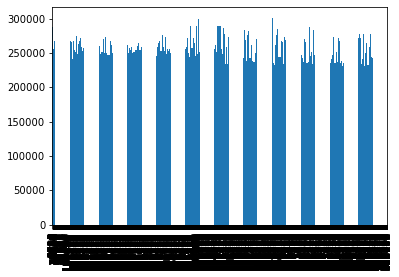

In [127]:
rc_mp.groupby("ETHZ_JOURNAL_TITLE")["RC_ID"].plot.bar()

# ResearchCollection.xlsx


In [54]:
rc = pd.read_excel("ResearchCollection.xlsx")

In [55]:
rc.head()

,NAME,SHORTNAME,TIMESTAMP,RESEARCH_OVERVIEW,DEPARTMENT_RESEARCH_WEBSITE
0,Architecture,D-ARCH,2020-05-08 17:50:35,D-ARCH_2020-05-08_17_50_35,https://arch.ethz.ch/en/forschung.html
1,"Civil, Environmental and Geomatic Engineering",D-BAUG,2020-10-08 15:38:04,D-BAUG_2020-10-08_15_38_04,https://baug.ethz.ch/en/research.html
2,Biosystems Science and Engineering,D-BSSE,2020-10-08 15:38:04,D-BSSE_2020-10-08_15_38_04,https://bsse.ethz.ch/research.html
3,Computer Science,D-INFK,2020-10-08 15:42:40,D-INFK_2020-10-08_15_42_40,https://inf.ethz.ch/research.html
4,Information Technology and Electrical Engineering,D-ITET,2020-10-08 15:42:40,D-ITET_2020-10-08_15_42_40,https://ee.ethz.ch/research.html


In [56]:
# nulls for columns
rc.isnull().sum(axis=0)

NAME                           0
SHORTNAME                      0
TIMESTAMP                      0
RESEARCH_OVERVIEW              0
DEPARTMENT_RESEARCH_WEBSITE    0
dtype: int64

## Exploring sub-selection options

#### This is code that is dumped from Data import

In [ ]:
rc_m.groupby("department_name").size().sort_values(ascending=False)

In [ ]:
titlexdep = pd.DataFrame(rc_m[["department_code","title"]].groupby("title").count())

In [ ]:
titlexdep= titlexdep.reset_index()

In [ ]:
titlexdep.columns = ["title","num_dept"]

In [ ]:
temp_df = titlexdep.merge(rc_m,how="right",left_on="title",right_on="title")

In [ ]:
temp_df[["department_name","num_dept"]].groupby("department_name").mean().sort_values(by="num_dept",ascending=False)

In [ ]:
rc_m.isnull().sum(axis=0)

**Complete file**

This file matches the D-ARCH file through the departments' name. <br>
Integrates departments info and websites links.

Andreas: Is this data needed at this point?

--- 

# Creating a final structure

(In my opinion) the best final data structure is a dictionary (aka a tree) - can be dumped into a json file - which is easy to load into a neo4j graph. <br>
In this section all the code to save the selected and integrated data into a dictionary.

Andreas: Yes good idea. But we could also just directly dump a dataframe into a json right? Since pandas supports nested structures. 

TODO:
* Write a function that joins authors in rcp with professors in pl
* Select relevant fields in first stage of the graph building and put in dataframe or dictionary
* Export as json